<a href="https://colab.research.google.com/github/pbplop29/ECE_Calculators/blob/main/Histogram_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HISTOGRAM MATCHING PROBLEM***
***The following are provided***
  - rk and zk
  - Prr and Pzz
  - nk

***You need to find***
  - nzk and Pz_actual

***And Compare Pzz and Pz_actual***

In [39]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib as mp

# INSERT BELOW THE PROVIDED VALUES

> ### Prr is the actual image histogram
> ### Pzz is the reference image histogram

- Change Prr and Pzz as per given in question along with nk
- If the image is of size MN then the sum of values of nk should be equal to MN
- The below example is for 8-bit and 64x64 image
- Change M and N values in the 2nd cell to adjust to image dimension
- Change bit value after that to adjust to number of bits

In [40]:
rk = [0,1,2,3,4,5,6,7]
zk = [0,1,2,3,4,5,6,7]
nk = [82,180,300,225,110,75,32,20]
#fill in here if Prr is given else we can find it from nk and rk only
#Prr = [0.08,0.18,0.29,0.22,0.11,0.07,0.03,0.02]
Pzz = [0,0.05,0.10,0.15,0.25,0.21,0.15,0.09]

In [41]:
Prr = []
MN = 0
for i in range(0,len(nk)):
  MN+=nk[i]


for i in range(0,len(nk)):
  Prr.append(float(round((nk[i]/MN),4)))

In [42]:
M = 32
N = 32
MN = M*N
bit = 7
check = 0
for i in range(0,len(nk)):
  check+=nk[i]
print(check)
if check/(M*N) == 1:
  print('✔️nk is Correctly Entered')
else:
  print('❌nk is Incorrectly Entered')

check = 0
for i in range(0,len(Prr)):
  check+=Prr[i]
print('➡️ Prr sum is', round(check,2))


check = 0
for i in range(0,len(Pzz)):
  check+=Pzz[i]
print('➡️ Pzz sum is', round(check,2))


1024
✔️nk is Correctly Entered
➡️ Prr sum is 1.0
➡️ Pzz sum is 1.0


In [43]:
Sk=[]
sum = 0;
for i in range(0,len(nk)):
  sum+=Prr[i]
  Sk.append(round((bit*sum),4))

In [44]:
Sk_int = []
for i in range(0,len(Sk)):
  Sk_int.append(int(round(Sk[i],0)))
Sk = Sk_int

In [45]:
Gk=[]
sum = 0;
for i in range(0,len(nk)):
  sum+=Pzz[i]
  Gk.append(round((bit*sum),4))

In [46]:
Gk_int = []
for i in range(0,len(Gk)):
  Gk_int.append(int(round(Gk[i],0)))
Gk = Gk_int

# First Phase Table

In [47]:
list_of_tuples = list(zip(rk,zk,nk, Prr,Sk,Pzz, Gk ))

first_table = pd.DataFrame(list_of_tuples,
                  columns = ['rk','zk', 'nk', 'Prr', 'Sk', 'Pzz', 'Gk'])



In [48]:
Sk_mapped = [0,1,2,3,4,5,6,7]
rk_mapped = []


for i in range(0,len(Sk_mapped)):
  temp = []
  for j in range (0,len(Sk_mapped)):
    if(Sk[j]==Sk_mapped[i]):
      temp.append(rk[j])
  rk_mapped.append(temp)

  

In [49]:
zk_mapped = []
for i in range(0,len(Sk)):
  temp = 0
  for j in range(0,len(Gk)):
    if Gk[j] == Sk[i]:
      temp = j
      break
    if Gk[j] > Sk[i] :
      temp = j-1
      break
  zk_mapped.append(temp)


In [50]:
zk_final = [0,0,0,0,0,0,0,0]

for i in range(0,len(rk_mapped)):
  for j in range(0,len(rk_mapped[i])):
    zk_final[i] = zk_mapped[rk_mapped[i][j]]

zk_mapped = zk_final

list_of_tuples = list(zip(rk_mapped,Sk_mapped,zk_mapped))

second_table = pd.DataFrame(list_of_tuples,
                  columns = ['rk_mapped','Sk_mapped','zk_mapped'])

# Mapping Phase Table

In [51]:
second_table.drop(second_table.index[second_table['zk_mapped'] == 0], inplace=True)


In [52]:
nzk = [0,0,0,0,0,0,0,0]
for i in range(0,len(nzk)):
  for j in range(0,len(rk_mapped[i])):
    nzk[zk_mapped[i]] += nk[rk_mapped[i][j]]

Pz_actual = []

for i in range(0,len(nzk)):
  Pz_actual.append(float(round((nzk[i]/MN),2)))

list_of_tuples = list(zip(zk,nzk,Pz_actual))

third_table = pd.DataFrame(list_of_tuples,
                  columns = ['zk','nzk','Pz_actual'])



# Final Table

In [53]:
first_table.style.hide_index()

rk,zk,nk,Prr,Sk,Pzz,Gk
0,0,82,0.080100,1,0.000000,0
1,1,180,0.175800,2,0.050000,0
2,2,300,0.293000,4,0.100000,1
3,3,225,0.219700,5,0.150000,2
4,4,110,0.107400,6,0.250000,4
5,5,75,0.073200,7,0.210000,5
6,6,32,0.031200,7,0.150000,6
7,7,20,0.019500,7,0.090000,7


In [54]:
second_table.style.hide_index()

rk_mapped,Sk_mapped,zk_mapped
[0],1,2
[1],2,3
[2],4,4
[3],5,5
[4],6,6
"[5, 6, 7]",7,7


In [55]:

third_table.style.hide_index()

zk,nzk,Pz_actual
0,0,0.000000
1,0,0.000000
2,82,0.080000
3,180,0.180000
4,300,0.290000
5,225,0.220000
6,110,0.110000
7,127,0.120000


# Comparision of Actual, Reference and Matched Histograms

Text(0.5, 0.98, 'Actual, Reference and Matched')

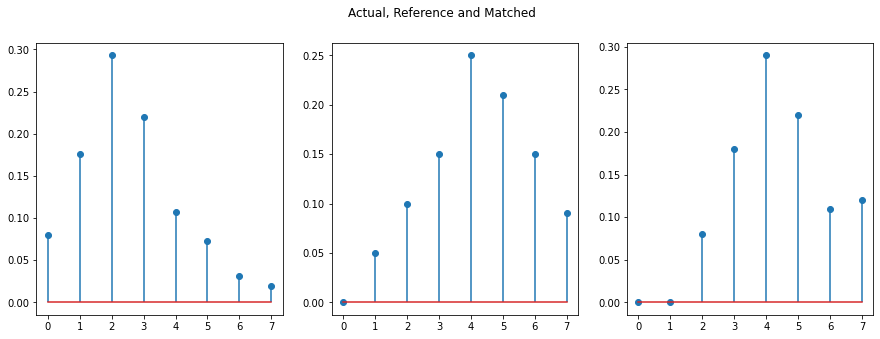

In [56]:
fig, axs = plt.subplots(1,3)
axs[0].stem(rk, Prr, use_line_collection = True)
axs[1].stem(zk, Pzz, use_line_collection = True)
axs[2].stem(zk, Pz_actual, use_line_collection = True)
fig = mp.pyplot.gcf()
fig.set_size_inches(15, 5)
plt.suptitle('Actual, Reference and Matched')
